<a href="https://colab.research.google.com/github/ElenilsonSilva/Data-science/blob/main/Elenilson_Silva_HandsOn_Regress%C3%A3o__Parte1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libs

In [ ]:
import pandas as pd
import numpy as np

# Carregar Dataset

In [ ]:
data = pd.read_csv('/content/HousingPrices-Amsterdam-August-2021.csv')
data.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


#Préprocessamento dos Dados

In [ ]:
data_cp = data.copy()

In [ ]:
# dropar colunas irrelevantes
# tratar coluna Zip
data_cp.drop(['Address', 'Unnamed: 0', 'Zip'], axis=1, inplace=True)

In [ ]:
data_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   920 non-null    float64
 1   Area    924 non-null    int64  
 2   Room    924 non-null    int64  
 3   Lon     924 non-null    float64
 4   Lat     924 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 36.2 KB


In [ ]:
# tratar dados faltantes
data_cp.dropna(inplace=True)

In [ ]:

# normalizar os dados em uma mesma escala
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
data_cp[['Price', 'Area', 'Room', 'Lon', 'Lat']] = scaler.fit_transform(data_cp[['Price', 'Area', 'Room', 'Lon', 'Lat']])

In [ ]:
data_cp.head()

,Price,Area,Room,Lon,Lat
0,0.116827,-0.556288,-0.359278,0.359469,-0.295927
1,-0.273000,-0.626687,-0.359278,-0.719097,-0.610844
2,0.423119,0.235704,0.277593,1.057128,-0.810667
3,-0.078087,0.570100,1.551335,-1.859596,-0.813579
4,0.181798,0.746098,0.914464,0.260899,1.966060


#Análise Exploratória dos Dados

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
%matplotlib inline

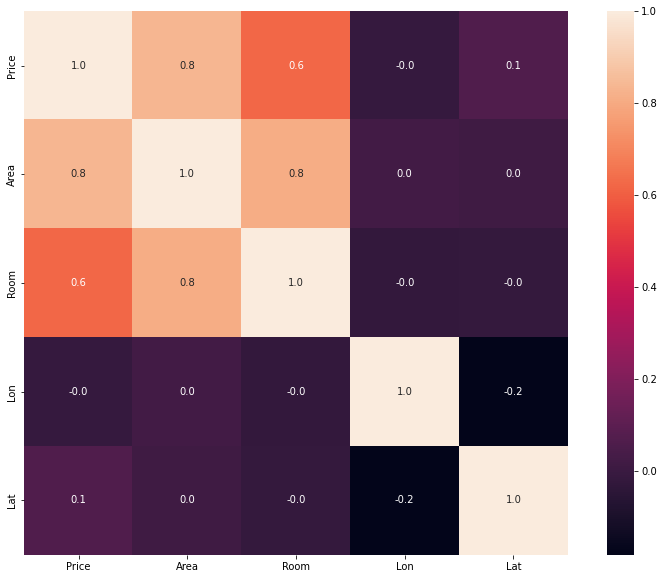

In [ ]:
# observar correlação com a variável alvo
plt.figure(figsize=(14, 10))
sns.heatmap(data_cp.corr(), fmt='.1f', square = True, linecolor = "white", annot= True)
plt.show()

In [ ]:
# observar estatísticas básicas das variáveis
data_cp.describe()

,Price,Area,Room,Lon,Lat
count,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02
mean,3.342737e-17,1.894620e-17,3.861645e-17,7.819832e-17,-1.021629e-13
std,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00
min,-8.298950e-01,-1.313080e+00,-1.633021e+00,-4.592911e+00,-2.984555e+00
25%,-5.050396e-01,-6.266872e-01,-3.592785e-01,-6.181671e-01,-4.719682e-01
50%,-2.878505e-01,-2.218915e-01,-3.592785e-01,-3.454822e-02,5.105979e-02
75%,1.446713e-01,3.061028e-01,2.775928e-01,6.345073e-01,5.937311e-01
max,9.890334e+00,9.282006e+00,6.646306e+00,2.645931e+00,2.517903e+00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


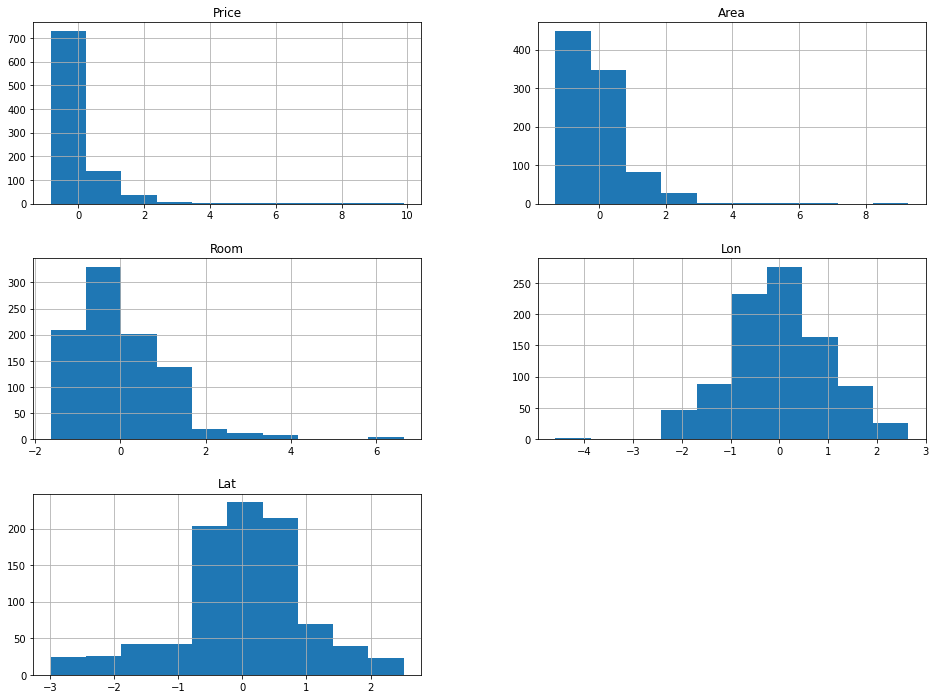

In [ ]:
# plotar histogramas das variáveis
fig = plt.figure(figsize=(16, 12))
ax = fig.gca()
data_cp.hist(ax=ax)
plt.show()

# Treinamento e Análise do Modelo

In [ ]:
# separar 30% dos dados para teste
from sklearn.model_selection import train_test_split

In [ ]:
data_cp.head()

,Price,Area,Room,Lon,Lat
0,0.116827,-0.556288,-0.359278,0.359469,-0.295927
1,-0.273000,-0.626687,-0.359278,-0.719097,-0.610844
2,0.423119,0.235704,0.277593,1.057128,-0.810667
3,-0.078087,0.570100,1.551335,-1.859596,-0.813579
4,0.181798,0.746098,0.914464,0.260899,1.966060


In [ ]:
X = data_cp.drop(columns=['Price'])
y = data_cp.Price

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
# plotar o y_true e o y_pred do conjunto de teste
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

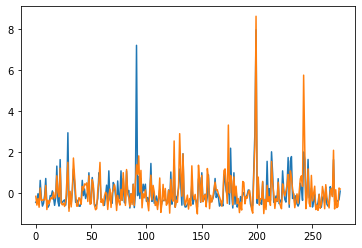

In [ ]:
plt.plot(range(len(y_test)), y_test, label='y_true')
plt.plot(range(len(y_test)), y_pred, label='y_pred')
plt.show()


In [ ]:
regressor.score(x_test, y_test)

0.7058038974188248

In [ ]:
# relatar se o resultado obtido é satisfatório e descrever próximos passos
É um resultado satisfatorio, foi uma primeira análise dos dados. 
Acredito que quando essa análise ser mais profunda, com mais estudo do caso, os resultado serão ainda melhores.